<a href="https://colab.research.google.com/github/lukas0780/Analise-de-data-sets-de-ataque-do-cora-o-/blob/main/3_58_horas_parkson_o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
#!!pip install pandas
#!!pip install numpy
#!!pip install seaborn
#!!pip install plotly==5.11.0

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import title
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt,pylab



In [64]:
dados= pd.read_csv('/content/Parkinsson disease.csv')

# Carregando datasets

In [65]:
dados.head(1)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654


# contabilizando quantidade de resultados 

In [66]:
resultado = dados["status"].value_counts()
resultado

1    147
0     48
Name: status, dtype: int64

# Criando matriz de correlação

In [67]:
matrizdecorrrelação = dados.corr()
matrizdecorrrelação["status"]

MDVP:Fo(Hz)        -0.383535
MDVP:Fhi(Hz)       -0.166136
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                -0.361515
status              1.000000
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
Name: status, dtype: float64

#Gerando mapa de calor da matriz de correlação 

Text(0.5, 1.0, 'Mapa de calor de matriz de correlação')

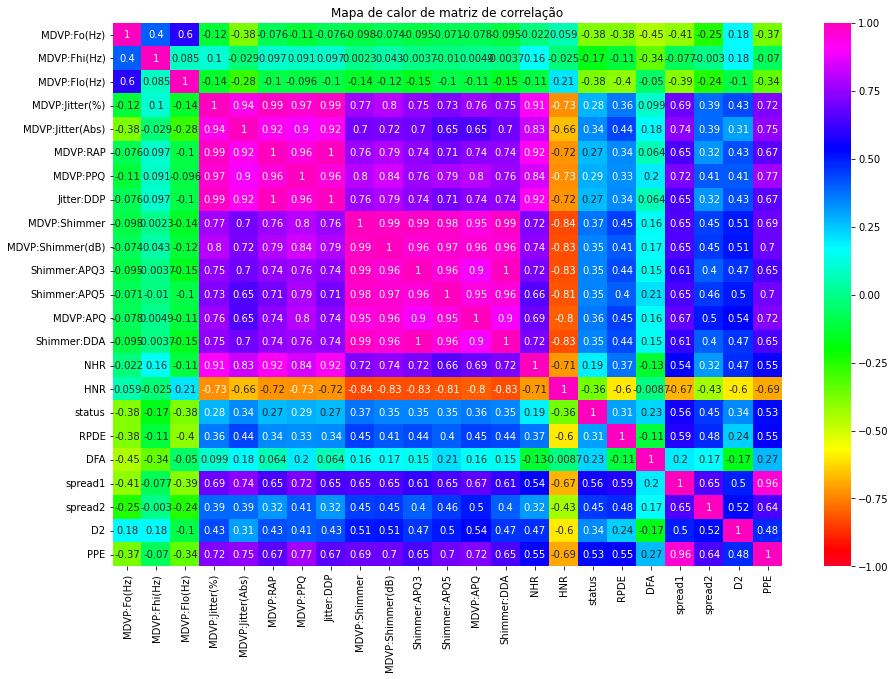

In [68]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(matrizdecorrrelação,annot= True,vmin=-1,vmax=1,cmap='gist_rainbow')
ax.set_title('Mapa de calor de matriz de correlação')


# Grafico para estudo de melhor k


In [69]:
dados.drop(["name"], axis=1, inplace=True)

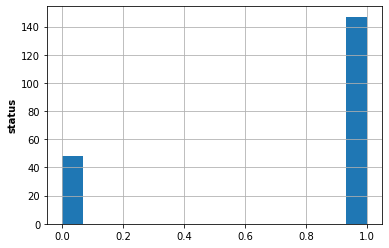

In [70]:
dados["status"].hist(bins=15)
plt.ylabel("status", fontweight='bold') 
plt.show()


In [71]:
#somando valores de status 
dados.count()


MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      195
MDVP:Jitter(Abs)    195
MDVP:RAP            195
MDVP:PPQ            195
Jitter:DDP          195
MDVP:Shimmer        195
MDVP:Shimmer(dB)    195
Shimmer:APQ3        195
Shimmer:APQ5        195
MDVP:APQ            195
Shimmer:DDA         195
NHR                 195
HNR                 195
status              195
RPDE                195
DFA                 195
spread1             195
spread2             195
D2                  195
PPE                 195
dtype: int64

# Calculado valores ausentes e apagando

In [72]:
dados.isnull().sum().sort_values(ascending = False)[:10]

MDVP:Fo(Hz)    0
MDVP:APQ       0
D2             0
spread2        0
spread1        0
DFA            0
RPDE           0
status         0
HNR            0
NHR            0
dtype: int64

# criando arvore de decisão 

In [73]:
#Biblioteca que faz o treinamento do algoritmo a partir de parametros
#definindo o tamanho da base de treinameto
from sklearn.tree import DecisionTreeRegressor ,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [74]:
x = dados.drop("status", axis = 1)
y = dados["status"] 

Separando carga de treino e carga de validação

In [75]:
Xtr, Xval, ytr, yval = train_test_split(x,y,test_size=0.5,random_state=0)

Criaçaõ de Modelo


In [76]:
arvore = DecisionTreeRegressor(max_depth = 6, random_state = 31)

Conferencia de arvore

In [77]:
arvore

DecisionTreeRegressor(max_depth=6, random_state=31)

Treinando modelo


In [78]:
arvore.fit(Xtr,ytr)

DecisionTreeRegressor(max_depth=6, random_state=31)

Visualizão grafica da arvore de visualização

In [79]:
import os 
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(arvore,
                out_file = 'arvore_de_predição_parkson.dot',#arquivo para armazenar arquivos
                rounded=True,
                filled=True
                )

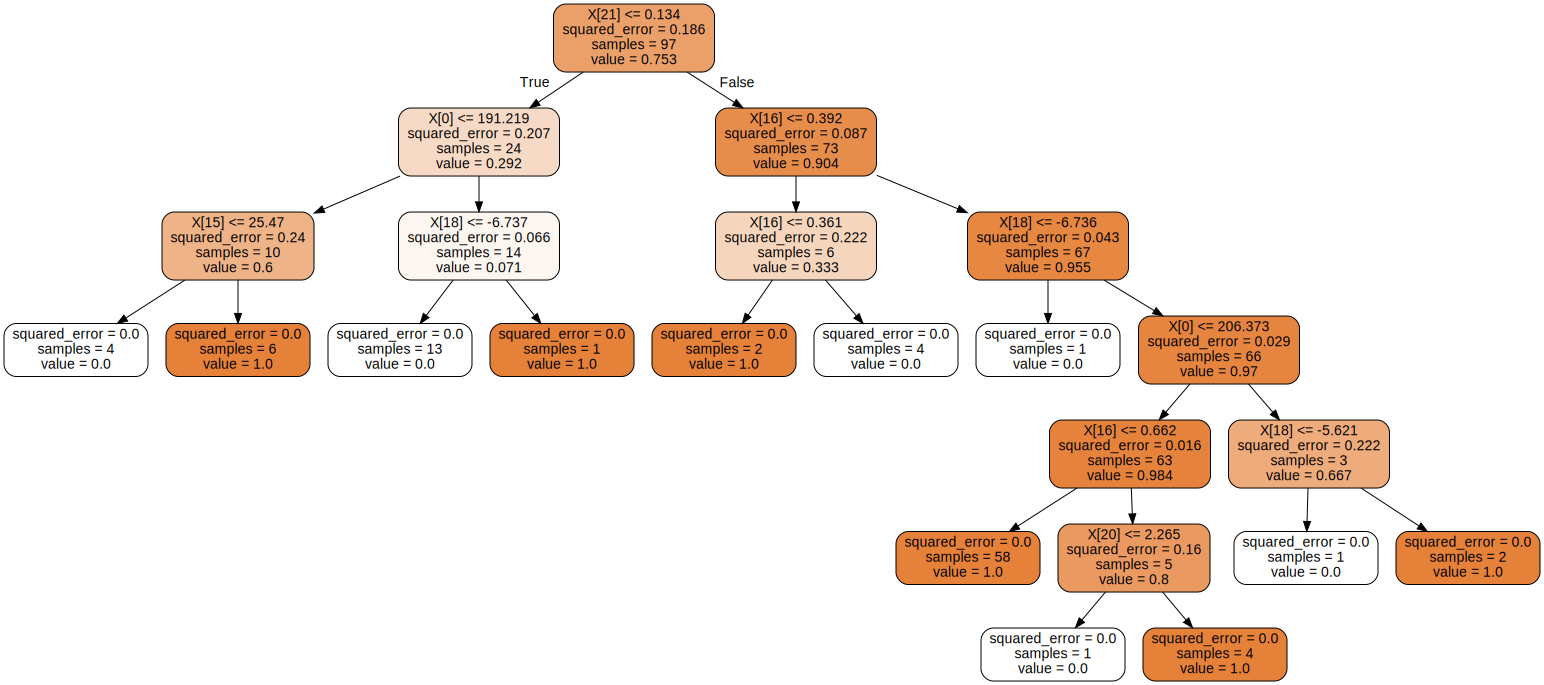

In [80]:
Source.from_file('arvore_de_predição_parkson.dot')

#Aplicar modelo de treinado

In [84]:
Xval[20:]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
56,110.417,131.067,103.370,0.00784,0.00007,0.00352,0.00514,0.01056,0.03715,0.334,...,0.02802,0.06097,0.00969,21.422,0.541781,0.821364,-4.438453,0.238298,1.922940,0.335041
173,113.715,116.443,96.913,0.00349,0.00003,0.00171,0.00203,0.00514,0.01472,0.133,...,0.01148,0.02245,0.00478,26.547,0.380253,0.766700,-5.943501,0.192150,1.852542,0.179677
136,113.400,133.344,107.816,0.00451,0.00004,0.00219,0.00283,0.00658,0.04879,0.431,...,0.04370,0.07154,0.02278,19.013,0.647900,0.708144,-4.378916,0.300067,2.445502,0.259451
89,179.711,225.930,144.878,0.00709,0.00004,0.00391,0.00419,0.01172,0.04313,0.442,...,0.03455,0.06892,0.07223,11.866,0.590951,0.745526,-4.379411,0.375531,3.671155,0.332086
63,228.832,234.619,223.634,0.00296,0.00001,0.00175,0.00155,0.00526,0.01644,0.145,...,0.01179,0.02647,0.00351,25.964,0.256570,0.683296,-7.245620,0.018689,2.498224,0.093534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,152.125,161.469,76.596,0.00382,0.00003,0.00191,0.00226,0.00574,0.05925,0.637,...,0.04398,0.10024,0.01211,20.969,0.447456,0.697790,-6.152551,0.173520,2.080121,0.160809
107,151.884,157.765,133.751,0.00258,0.00002,0.00115,0.00122,0.00346,0.01450,0.137,...,0.01267,0.01898,0.00659,26.833,0.393563,0.700246,-6.600023,0.249172,2.499148,0.105306
154,119.100,128.442,88.833,0.00692,0.00006,0.00393,0.00300,0.01179,0.02682,0.236,...,0.02018,0.04451,0.04611,21.824,0.651680,0.659333,-4.239028,0.175691,2.451130,0.247455
187,116.342,581.289,94.246,0.00267,0.00002,0.00115,0.00148,0.00345,0.01300,0.117,...,0.01144,0.01892,0.00680,25.023,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868


In [85]:
teste= arvore.predict(Xval)

#criando matriz de confução

In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
#matriz de confusão
confusion_matrix(yval,teste)

array([[19,  5],
       [ 3, 71]])

In [89]:
#Organizando a visualização da matriz
cm = confusion_matrix(yval,teste)
tn,fp,fn,tp = cm.ravel()



reorganizando matriz de confusão

In [96]:
cm_reorganizada = np.array([[tp,fn],[fp,tn]])
cm_reorganizada

array([[71,  3],
       [ 5, 19]])

In [97]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(1.3, 0.5, 'TN')

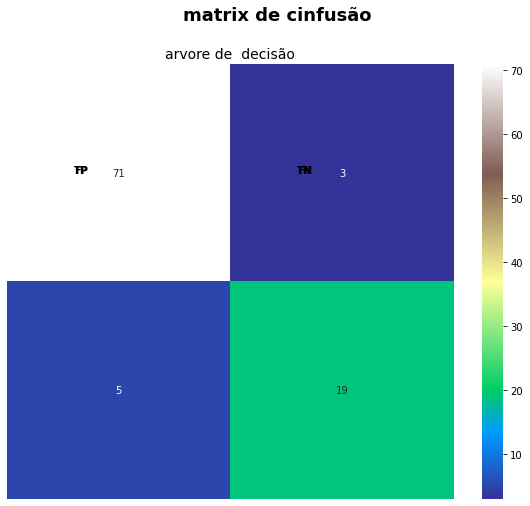

In [103]:
#visualização de grafico 


arvore_title = "arvore de  decisão"
fig = plt.figure(figsize=(10,8))
fig.suptitle("matrix de cinfusão" , fontsize = 18, fontweight= 'bold')

sns.heatmap(cm_reorganizada,cmap='terrain',annot=True)

plt.title(arvore_title ,fontsize = 14)

plt.xticks([])
plt.yticks([])


plt.annotate('TP',(0.3,0.5), fontweight = 'bold')
plt.annotate('FN',(1.3,0.5), fontweight = 'bold')
plt.annotate('FP',(0.3,0.5), fontweight = 'bold')
plt.annotate('TN',(1.3,0.5), fontweight = 'bold')

In [107]:
from sklearn.metrics import classification_report

In [109]:
print(classification_report(yval,teste))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.93      0.96      0.95        74

    accuracy                           0.92        98
   macro avg       0.90      0.88      0.89        98
weighted avg       0.92      0.92      0.92        98

